## Performing EDA practical applications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import all the required libraries
- %matplotlib inline to just plot the graphs inside jupyter notebook itself
- warnings.filterwarnings("ignore") to ignore if there will any warnings

## Data profiling

In [2]:
data = pd.read_csv(r"data\student.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Read the data and print the first 5 records with head() method.

In [3]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Print the last 5 records with tail() method.

In [4]:
data.shape

(1000, 8)

Print the shape of the data i.e. 1000 rows & 8 columns

### Info of the dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Print the data types, null rows count of whole columns of the data
\
But what if we want to seperate the object datatype columns and int datatype columns.

### Seperate categorical & numerical columns.

In [6]:
data['gender'].dtype

dtype('O')

This will give the datatype of the specified individual column. The datatype is 'O' means Object.

In [7]:
data['gender'].dtype == "O"

True

In [8]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

So for seperating the categorical & numerical columns, we have to iterate through all the columns of the datafrae.

In [9]:
categorical_data = [feature for feature in data.columns if data[feature].dtype == "O"]
numerical_data = [feature for feature in data.columns if data[feature].dtype != "O"]

Here we have used a list comprehension, we are iterating through each column of dataframe and checking the datatpe of that column. If the datatype == "O" then it's categorical otherwise it's numerical.

In [10]:
data[numerical_data]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [11]:
data[categorical_data]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


### Memory usage column wise

In [12]:
data.memory_usage()

Index                           132
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

The above method will give the memory usage column wise of the dataframe. The memory is in bytes
- Index is using 132 bytes
- Rest all are using 8000 bytes of memory.

### Missing Value

In [13]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We have above method to check the missing values. It will give true false as a result. We can also use .sum() to just check the total missing values in the data.

### Duplicate values

In [14]:
data.duplicated().sum()

0

We have above method to check the duplicate records. It will give true false as a result. We can also use .sum() to just check the total duplicate records in the data.

### Unique values

In [15]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

To check unique records in each & every column of the dataframe we have above function.

In [16]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

To check manually for individual columns with the unique values, then we have above function.

## Statistical Analysis

### Statistical description of data

In [17]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


This will give the entire description of the numerical data.
- Total number of records as count
- Mean of the each columns as mean
- Standerd deviation of columns as std
- Minimum value of columns as min
- 25% quartile as 25%
- 50% quartile or median as 50%
- 75% quartile as 75%
- maximum value as max

- Minimum value of columns as min
- 25% quartile as 25%
- 50% quartile or median as 50%
- 75% quartile as 75%
- maximum value as max

**this five things are also called as five number summary in statistics and very important interview question**

### Correlation of data

In [18]:
data[numerical_data].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


correlation cannot be drawn on categorical data so can use data[numerical_data].corr() to find correlation of only numerical columns.
- The diagonal correlation values will be always 1 as the correlation between same columns must have to be 1 always.
- math score with reading score has good positive correlation i.e. **0.817580**
- Also reading score with writing score has highest correlation i.e. **0.954598**

**Conclusion**:
- we can conclude from the above correlation that if we are good reader then can also good writer.

### Covariance

In [19]:
data[numerical_data].cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


- Covariance also gives us the correlation between the columns
- But only drawback of covariance is the value is not defined, it can go from - infinity to + infinity
- Hence we cannot deside the max and min correlation.

### Skewness

In [20]:
data[numerical_data].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

we have all the values negative means the columns are left-skewed.

<Axes: xlabel='writing score', ylabel='Density'>

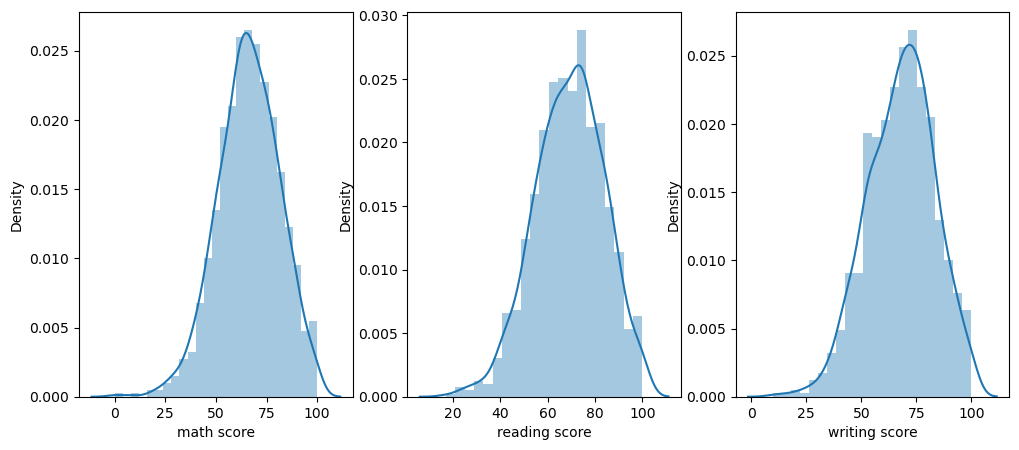

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(data['math score'])
plt.subplot(1,3,2)
sns.distplot(data['reading score'])
plt.subplot(1,3,3)
sns.distplot(data['writing score'])

As we said above all the three columns are left skewed.

### Derived column

In [22]:
data['Average score'] = (data['math score'] + data['reading score'] + data['writing score'])/3
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### Group By operations

In [23]:
data[numerical_data].groupby(data['gender']).mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [24]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


### **Find out no of students whoever is having math score < 30**

In [25]:
data[data['math score'] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Average score                  14
dtype: int64

### Check the distribution 

In [26]:
import scipy
from scipy.stats import normaltest

In [27]:
numerical_data = data[numerical_data]
pvalue_result = normaltest(numerical_data)

In [28]:
pvalue_result[1]*100

array([0.04508029, 0.38537584, 0.11101885])

If the p-value of the distribution is < 0.05 then we can say that the distribution is not normal.
\
If the p-value > 0.05 then it is normally distributed.
- Here the p-value are **[0.0004508 , 0.00385376, 0.00111019]** so three of the p-values are < 0.05 hence we can say that the three columns are not normally distributed

<Axes: xlabel='writing score', ylabel='Density'>

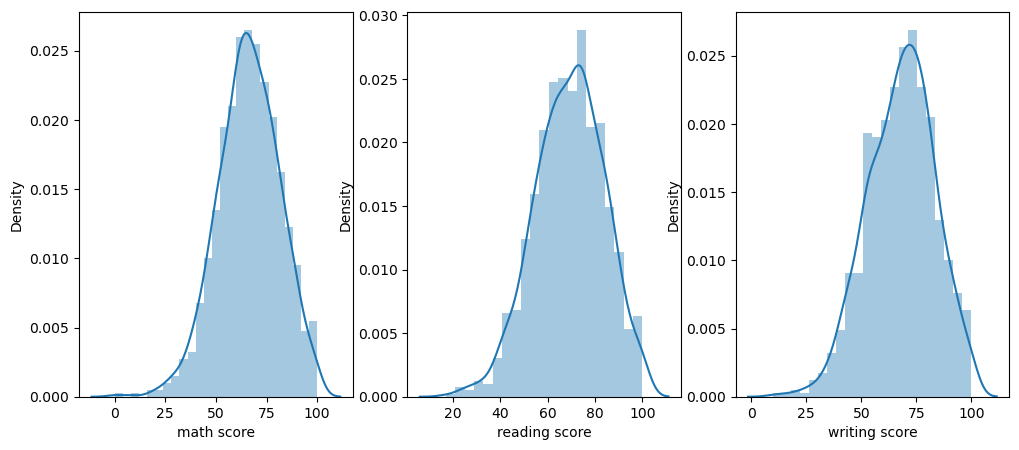

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(data['math score'])
plt.subplot(1,3,2)
sns.distplot(data['reading score'])
plt.subplot(1,3,3)
sns.distplot(data['writing score'])

<Axes: >

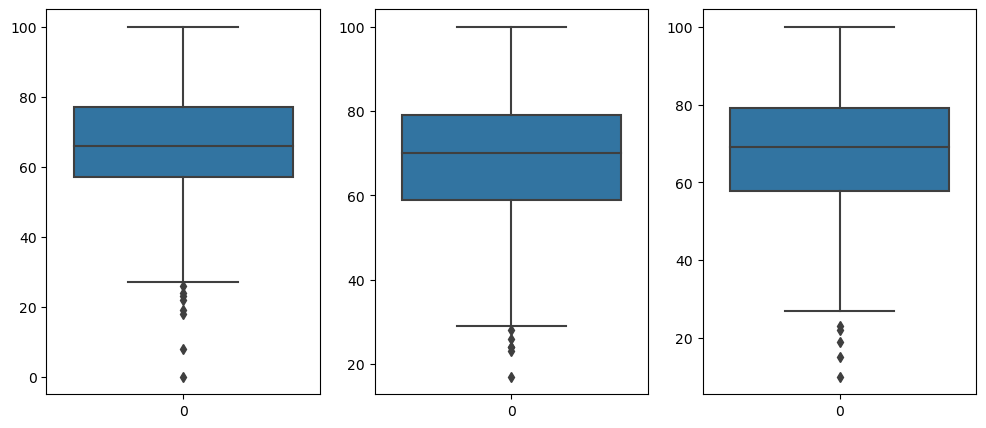

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(data['math score'])
plt.subplot(1,3,2)
sns.boxplot(data['reading score'])
plt.subplot(1,3,3)
sns.boxplot(data['writing score'])

In [31]:
data['math score'].quantile(0.25) # 25 percentile data

57.0

### Outlier

In [32]:
Q1 = data['math score'].quantile(0.10)
Q3 = data['math score'].quantile(0.90)
print(f"The Q1 is {Q1} & Q3 is {Q3}")

IQR = Q3 - Q1
print(f"IQR is {IQR}")

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(f"lower bound is {lower_limit} & upper bound is {upper_limit}")

print(f"max of math score {data['math score'].max()} & min is {data['math score'].min()}")

The Q1 is 47.0 & Q3 is 86.0
IQR is 39.0
lower bound is -11.5 & upper bound is 144.5
max of math score 100 & min is 0


### Now let's check for Outlier in math score column

In [33]:
data[data['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score


In [34]:
data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score


As per our considertaion of IQR & lower & upper limits, we don't have any outlier in the math score column.
- As we know the maximum math score is 100 and minimum is 0
- But as per our range lower limit is -11.5 & upper is 144.5
- So now we have to reduce the Q1 & Q3 values to take appropriate upper & lower limits means trim the data

### Outliers after revising the limits

In [35]:
Q1 = data['math score'].quantile(0.25)
Q3 = data['math score'].quantile(0.75)
print(f"The Q1 is {Q1} & Q3 is {Q3}")

IQR = Q3 - Q1
print(f"IQR is {IQR}")

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(f"lower bound is {lower_limit} & upper bound is {upper_limit}")

print(f"max of math score {data['math score'].max()} & min is {data['math score'].min()}")

The Q1 is 57.0 & Q3 is 77.0
IQR is 20.0
lower bound is 27.0 & upper bound is 107.0
max of math score 100 & min is 0


In [36]:
data[data['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score


In [37]:
data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


So we are getting outliers below the lower limit, so we should remove this data

### Creating a function to create upper & lower limits

In [38]:
def create_limits(df, column_name, q1, q3):
    Q1 = df[column_name].quantile(q1)
    Q3 = df[column_name].quantile(q3)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

In [39]:
up, lo = create_limits(data, 'math score', 0.25, 0.75)

data.loc[data['math score'] < lo]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [40]:
for columns in numerical_data.columns:
    upper, lower = create_limits(numerical_data, columns, 0.25, 0.75)

    print(f"column name : {columns} upper limit : {upper} lower limit : {lower}")

column name : math score upper limit : 107.0 lower limit : 27.0
column name : reading score upper limit : 109.0 lower limit : 29.0
column name : writing score upper limit : 110.875 lower limit : 25.875


In [41]:
def replace_outliers(numeric_data):
    for column in numeric_data.columns:
        upper, lower = create_limits(numeric_data, column, 0.25, 0.75)
        upper_bound = numeric_data.loc[numeric_data[column] > upper]
        lower_bound = numeric_data.loc[numeric_data[column] < lower]

        return upper_bound, lower_bound

In [42]:
replace_outliers(numerical_data)

(Empty DataFrame
 Columns: [math score, reading score, writing score]
 Index: [],
      math score  reading score  writing score
 17           18             32             28
 59            0             17             10
 145          22             39             33
 338          24             38             27
 466          26             31             38
 787          19             38             32
 842          23             44             36
 980           8             24             23)

### Graphs

In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<Axes: xlabel='gender', ylabel='count'>

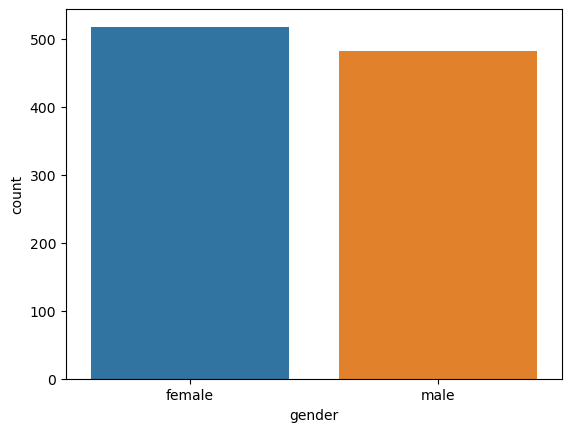

In [50]:
sns.countplot(data=data, x=data['gender'])

<Axes: xlabel='race/ethnicity', ylabel='count'>

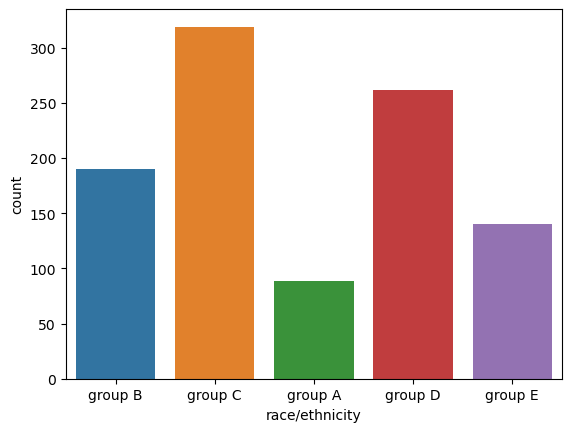

In [51]:
sns.countplot(data=data, x=data['race/ethnicity'])

<Axes: >

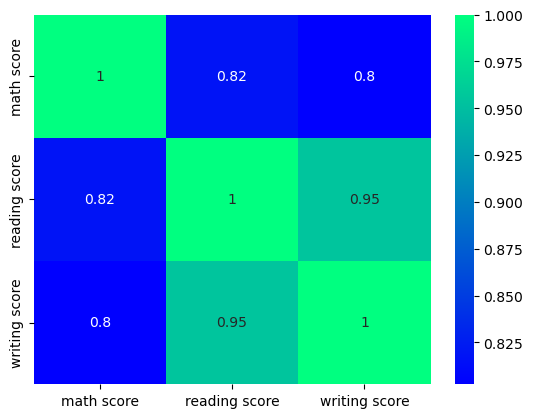

In [57]:
sns.heatmap(numerical_data.corr(), cmap="winter", yticklabels=True, annot=True)